In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate 
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)
import math

In [2]:
no_of_bins = 100
survey_area = 4

In [3]:
#Read in dataset

data_0 = pd.read_csv("tao_aponte_01_catalogue_3963.csv")

# data_0[('Redshift_Observed')]

#Read in dataset

data_1 = pd.read_csv("tao.4045.0.csv")

# data_0[('Redshift_Observed')]

In [4]:
data0 = data_0.sort_values('Redshift_Observed')
data1 = data_1.sort_values('Redshift_Observed')
# data[('Redshift_Observed')]

In [5]:
#Estimate supernova rate per stellar mass using arbitrary parameters for now (added the multiplcation for the units - 10^10  solar mass)

try:
    supernovae_rate_assuming_const_rate_per_stellar_mass0 = ((((1/100)))*((data0['Total_Stellar_Mass'])))*(10**10)/(10**10.5)
except:
    supernovae_rate_assuming_const_rate_per_stellar_mass0 = ((((1/100)))*((data0['total_stellar_mass'])))*(10**10)/(10**10.5)
    
#supernovae_rate_per_stellar_mass

#Estimate supernova rate per stellar mass using arbitrary parameters for now (added the multiplcation for the units - 10^10  solar mass)

try:
    supernovae_rate_assuming_const_rate_per_stellar_mass1 = ((((1/100)))*((data1['Total_Stellar_Mass'])))*(10**10)/(10**10.5)
except:
    supernovae_rate_assuming_const_rate_per_stellar_mass1 = ((((1/100)))*((data1['total_stellar_mass'])))*(10**10)/(10**10.5)
    
#supernovae_rate_per_stellar_mass

In [6]:
#Estimate TDE rate using arbitrary parameters for now

blackholemass = np.array(data0['Black_Hole_Mass'])*10**10
bh = np.zeros_like(blackholemass)

bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))] = 1  
        
try:
    TDE_rate0 = ((1/10000))*(bh)
except:
    TDE_rate0 = ((1/10000))*(bh)
    
number_of_bh = len(bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))])

#Estimate TDE rate using arbitrary parameters for now

blackholemass = np.array(data1['Black_Hole_Mass'])*10**10
bh = np.zeros_like(blackholemass)

bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))] = 1  
        
try:
    TDE_rate1 = ((1/10000))*(bh)
except:
    TDE_rate1 = ((1/10000))*(bh)
    
number_of_bh = len(bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))])

In [7]:
#Insert rates into tables

data0.insert(loc=8,
          column='supernovae_rate_assuming_const_rate_per_stellar_mass0',
          value=supernovae_rate_assuming_const_rate_per_stellar_mass0)        


data0.insert(loc=9,
          column='TDE_rate0',
          value=TDE_rate0)   

#Insert rates into tables

data1.insert(loc=8,
          column='supernovae_rate_assuming_const_rate_per_stellar_mass1',
          value=supernovae_rate_assuming_const_rate_per_stellar_mass1)        


data1.insert(loc=9,
          column='TDE_rate1',
          value=TDE_rate1)   

In [8]:
#Some useful parameters regarding redshift

try:
    z0 = data0['Redshift_Observed']
except:
    z0 = data0['redshift_observed']
    
bins_z0 = np.linspace(np.min(z0), np.max(z0), no_of_bins)
binsize0 = (np.max(z0) - np.min(z0))/no_of_bins
digitized_z0 = np.digitize(z0, bins_z0) #creates mask for each bin
bin_means_z0 = [z0[digitized_z0 == i].mean() for i in range(0, len(bins_z0))]
#print(bins_z)
#print(np.shape(bins_z))

#Some useful parameters regarding redshift

try:
    z1 = data1['Redshift_Observed']
except:
    z1 = data1['redshift_observed']
    
bins_z1 = np.linspace(np.min(z1), np.max(z1), no_of_bins)
binsize1 = (np.max(z1) - np.min(z1))/no_of_bins
digitized_z1 = np.digitize(z1, bins_z1) #creates mask for each bin
bin_means_z1 = [z1[digitized_z1 == i].mean() for i in range(0, len(bins_z1))]
#print(bins_z)
#print(np.shape(bins_z))

In [9]:
#Calculate Comoving Volume

comoving_volume = WMAP9.comoving_volume(bins_z0)  #Give Volume in Mpc^3
comoving_volume_unbinned = WMAP9.comoving_volume(z0)

#Calculate Comoving Volume

comoving_volume = WMAP9.comoving_volume(bins_z1)  #Give Volume in Mpc^3
comoving_volume_unbinned = WMAP9.comoving_volume(z1)

In [10]:
tde0 = data0['TDE_rate0']
bin_sum_tde0 = [tde0[digitized_z0 == i].sum() for i in range(0, len(bins_z0))]
bin_sum_tde_per_square_degree0 = np.array(bin_sum_tde0)/survey_area
bin_sum_tde_all_sky0 = bin_sum_tde_per_square_degree0*41253

tde1 = data1['TDE_rate1']
bin_sum_tde1 = [tde1[digitized_z1 == i].sum() for i in range(0, len(bins_z1))]
bin_sum_tde_per_square_degree1 = np.array(bin_sum_tde1)/survey_area
bin_sum_tde_all_sky1 = bin_sum_tde_per_square_degree1*41253

C:\Users\steve\AppData\Local\Temp\ipykernel_7908\2964760895.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(bin_means_z0, np.log10(np.array(np.cumsum(bin_sum_tde_all_sky0/2))), label = 'Millenium')
C:\Users\steve\AppData\Local\Temp\ipykernel_7908\2964760895.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(bin_means_z1, np.log10(np.array(np.cumsum(bin_sum_tde_all_sky1/2))), label = 'GiggleZ')


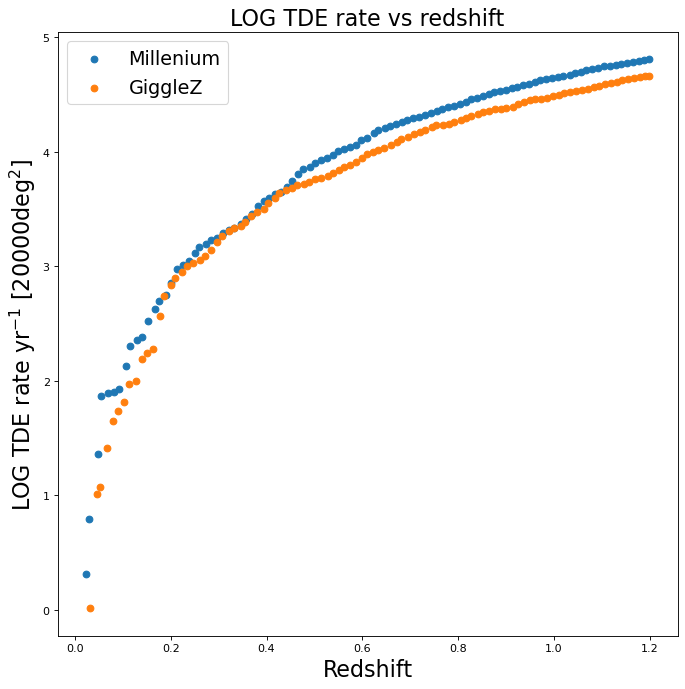

In [11]:
#Cumulative TDE rate all sky - 20,000deg^2 for LSST LOG
fontsize = 20
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z0, np.log10(np.array(np.cumsum(bin_sum_tde_all_sky0/2))), label = 'Millenium')
plt.scatter(bin_means_z1, np.log10(np.array(np.cumsum(bin_sum_tde_all_sky1/2))), label = 'GiggleZ')
plt.xlabel('Redshift', fontdict={'fontsize': fontsize})
plt.ylabel('LOG TDE rate yr$^{-1}$ [20000deg$^{2}$]', fontdict={'fontsize': fontsize})
plt.title('LOG TDE rate vs redshift', fontdict={'fontsize': fontsize})
plt.legend(fontsize = 'xx-large')

plt.show()

In [12]:
sm0 = data0['supernovae_rate_assuming_const_rate_per_stellar_mass0'] 
bin_sum_sm0 = [sm0[digitized_z0 == i].sum() for i in range(0, len(bins_z0))]
bin_sum_sm_per_square_degree0 = np.array(bin_sum_sm0)/survey_area
bin_sum_sm_all_sky0 = bin_sum_sm_per_square_degree0*41253

sm1 = data1['supernovae_rate_assuming_const_rate_per_stellar_mass1'] 
bin_sum_sm1 = [sm1[digitized_z1 == i].sum() for i in range(0, len(bins_z1))]
bin_sum_sm_per_square_degree1 = np.array(bin_sum_sm1)/survey_area
bin_sum_sm_all_sky1 = bin_sum_sm_per_square_degree1*41253

C:\Users\steve\AppData\Local\Temp\ipykernel_7908\1834650968.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(bin_means_z0, np.log10(np.array(np.cumsum(bin_sum_sm_all_sky0/2))), label = 'Millennium')
C:\Users\steve\AppData\Local\Temp\ipykernel_7908\1834650968.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(bin_means_z1, np.log10(np.array(np.cumsum(bin_sum_sm_all_sky1/2))), label = 'GiggleZ')


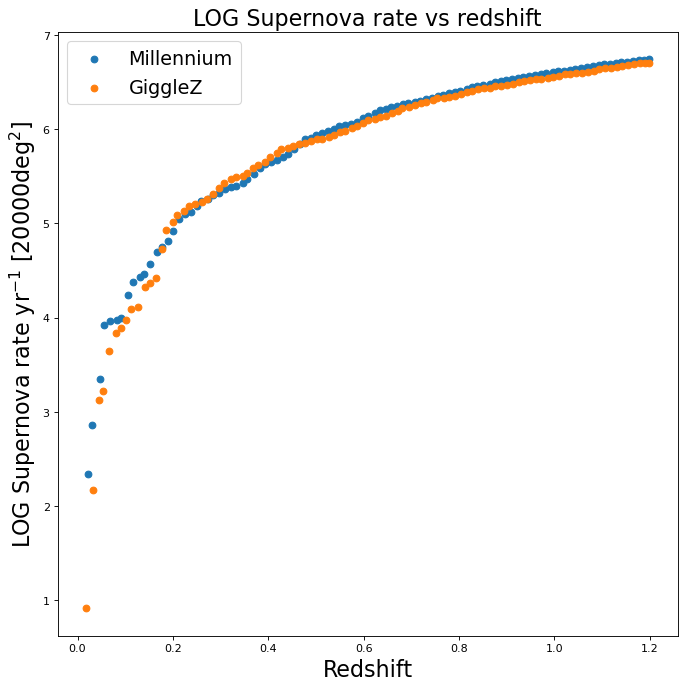

In [13]:
#Cumulative Supernova rate assuming const rate per stellar mass all sky - 20,000deg^2 for LSST LOG

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z0, np.log10(np.array(np.cumsum(bin_sum_sm_all_sky0/2))), label = 'Millennium')
plt.scatter(bin_means_z1, np.log10(np.array(np.cumsum(bin_sum_sm_all_sky1/2))), label = 'GiggleZ')
plt.xlabel('Redshift', fontdict={'fontsize': fontsize})
plt.ylabel('LOG Supernova rate yr$^{-1}$ [20000deg$^{2}$]', fontdict={'fontsize': fontsize})
plt.title('LOG Supernova rate vs redshift', fontdict={'fontsize': fontsize})
plt.legend(fontsize = 'xx-large')

plt.show()